In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,SCORERS
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1)

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Make,Model,year,CC,distance,transmission,color,price
0,0,Chevrolet,Aveo,2012,1500,99000,manual,Silver,127000
1,1,Volkswagen,Jetta,2008,1500,200000,automatic,Silver,179000
2,2,Opel,Astra,2020,1500,57000,automatic,Silver,325000
3,3,Skoda,Octavia A5,2007,1600,150000,automatic,Gray,163000
4,4,Hyundai,Accent RB,2015,1600,135000,automatic,Black,190000


In [4]:
df.drop('Unnamed: 0' , axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          6471 non-null   object
 1   Model         6471 non-null   object
 2   year          6471 non-null   int64 
 3   CC            6471 non-null   int64 
 4   distance      6471 non-null   int64 
 5   transmission  6471 non-null   object
 6   color         6471 non-null   object
 7   price         6471 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 404.6+ KB


In [6]:
df.describe()

,year,CC,distance,price
count,6471.000000,6471.000000,6471.000000,6471.000000
mean,2010.276155,1569.445063,150509.845155,141289.367795
std,6.241551,55.100305,66950.257548,66280.740127
min,1990.000000,1360.000000,45.000000,35000.000000
25%,2007.000000,1500.000000,100000.000000,90000.000000
50%,2011.000000,1600.000000,150000.000000,128000.000000
75%,2015.000000,1600.000000,200000.000000,180000.000000
max,2020.000000,1700.000000,375000.000000,350000.000000


# EDA and Visualization

## Different car manufacturers price analysis

In [308]:
df.groupby('Make').describe()['price'].sort_values('max')

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Daihatsu,1.0,42000.000000,NaN,42000.0,42000.0,42000.0,42000.0,42000.0
Chana,1.0,47000.000000,NaN,47000.0,47000.0,47000.0,47000.0,47000.0
Lifan,1.0,50000.000000,NaN,50000.0,50000.0,50000.0,50000.0,50000.0
Faw,2.0,54000.000000,19798.989873,40000.0,47000.0,54000.0,61000.0,68000.0
Jac,2.0,86500.000000,19091.883092,73000.0,79750.0,86500.0,93250.0,100000.0
Great Wall,3.0,90000.000000,10000.000000,80000.0,85000.0,90000.0,95000.0,100000.0
Saipa,9.0,75777.777778,14498.084165,57000.0,70000.0,73000.0,85000.0,105000.0
Audi,2.0,75000.000000,49497.474683,40000.0,57500.0,75000.0,92500.0,110000.0
Soueast,3.0,111666.666667,2886.751346,110000.0,110000.0,110000.0,112500.0,115000.0


C:\Users\Mostafa Hesham\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


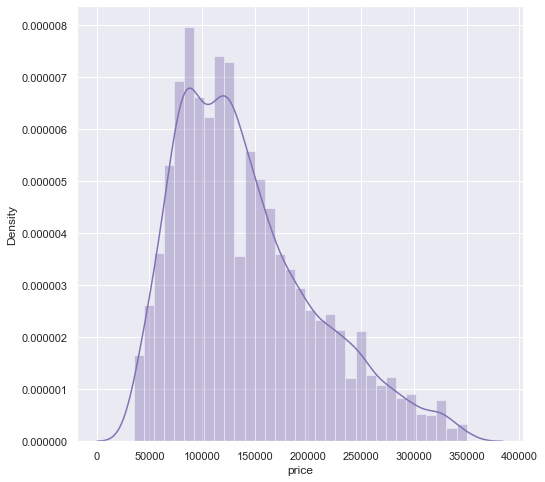

In [312]:
sns.distplot(df['price'],color='m')

C:\Users\Mostafa Hesham\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


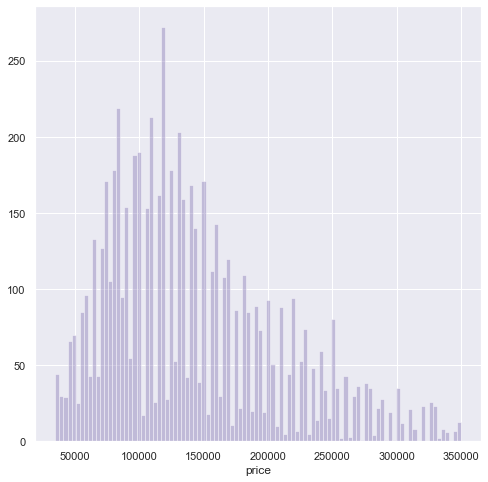

In [313]:
sns.distplot(df['price'], kde=False, color='m' ,bins=100)

### note that most cars prices are less than 200,000 EGP

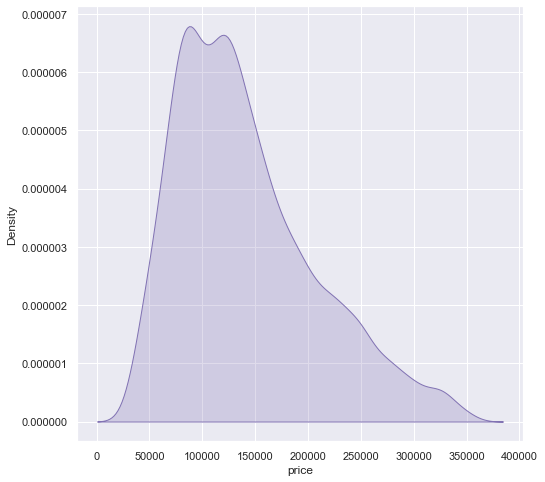

In [314]:
sns.kdeplot(df['price'], shade=True, color='m')

### what the top 10 most expensive cars?

In [315]:
df.sort_values('price',ascending=False).head(10)

,Unnamed: 0,Make,Model,year,CC,distance,transmission,color,price
4926,4926,Kia,Cerato,2018,1600,79000,automatic,Silver,350000
3734,3734,Toyota,Corolla,2020,1600,45000,automatic,Silver,350000
3229,3229,Toyota,Corolla,2017,1600,136000,automatic,Silver,350000
1125,1125,Toyota,Corolla,2018,1600,100000,automatic,Gray,350000
5435,5435,Mercedes,C 180,2011,1600,153000,automatic,White,350000
6222,6222,Hyundai,Elantra AD,2019,1600,40000,automatic,Light grey,350000
1780,1780,BMW,316,2014,1600,175000,automatic,Black,350000
3180,3180,Toyota,Corolla,2019,1600,73000,automatic,Dark blue,350000
405,405,Volvo,S60,2015,1600,131000,automatic,Silver,350000
3398,3398,Skoda,Octavia A7,2016,1600,119000,automatic,Light grey,350000


In [316]:
df.sort_values('price',ascending=True).head(10)

,Unnamed: 0,Make,Model,year,CC,distance,transmission,color,price
5598,5598,Fiat,Shahin,2001,1400,150000,manual,Dark blue,35000
3132,3132,Mitsubishi,Lancer,1990,1600,300000,manual,Dark blue,35000
4514,4514,Fiat,Shahin,2006,1600,150000,manual,White,35000
5868,5868,Peugeot,405,1994,1600,140000,manual,White,35000
2632,2632,Fiat,Dogan,1995,1600,220000,manual,Silver,35000
2285,2285,Fiat,Shahin,1995,1600,200000,manual,Green,35000
2351,2351,Ford,Escort,1998,1600,200000,manual,Blue,35000
6134,6134,Lada,2105,1995,1600,75000,manual,Dark red,35000
4362,4362,Hyundai,Excel,1995,1600,200000,manual,White,35000
5295,5295,Hyundai,Excel,1996,1600,150000,manual,Blue,35000


### what is the mean price for each maker and each model ?

In [317]:
df.groupby('Model').describe()['price']

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
19,2.0,38500.000000,707.106781,38000.0,38250.0,38500.0,38750.0,39000.0
200,1.0,285000.000000,NaN,285000.0,285000.0,285000.0,285000.0,285000.0
2017,1.0,47000.000000,NaN,47000.0,47000.0,47000.0,47000.0,47000.0
207,7.0,126285.714286,28376.717485,85000.0,116000.0,127000.0,130000.0,180000.0
2105,2.0,37500.000000,3535.533906,35000.0,36250.0,37500.0,38750.0,40000.0
...,...,...,...,...,...,...,...,...
XD,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.0,120000.0
Xsara,7.0,65000.000000,8062.257748,58000.0,60000.0,64000.0,65500.0,82000.0
Yaris,16.0,194375.000000,48917.447467,130000.0,140000.0,200000.0,241250.0,260000.0


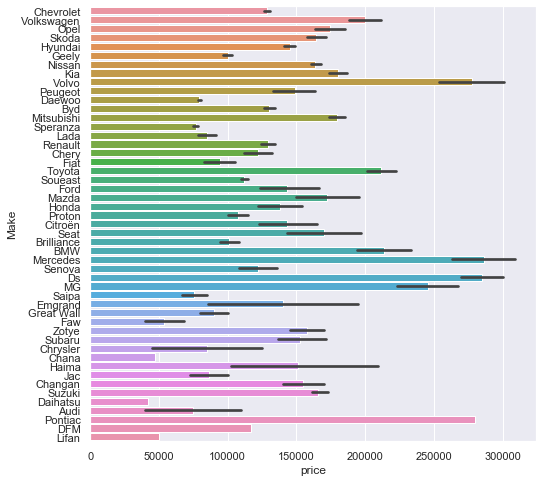

In [9]:

sns.barplot(x='price', y='Make', data=df,estimator=np.mean)

## what are the most 5 frequent colors of cars ?

In [319]:
df['color'].value_counts().nlargest(5)

Silver        1335
Black         1205
White          533
Light grey     514
Dark red       501
Name: color, dtype: int64

##  what are the most frequent colors for most expensive cars?

In [320]:
df.sort_values('price',ascending=False).head(100)['color'].value_counts()

Silver        28
Black         21
White         15
Gray           9
Light grey     5
Red            5
Dark blue      3
Gold           3
Dark red       3
Brown          2
Petroleum      2
Blue           1
Mocha          1
Bronze         1
Olive          1
Name: color, dtype: int64

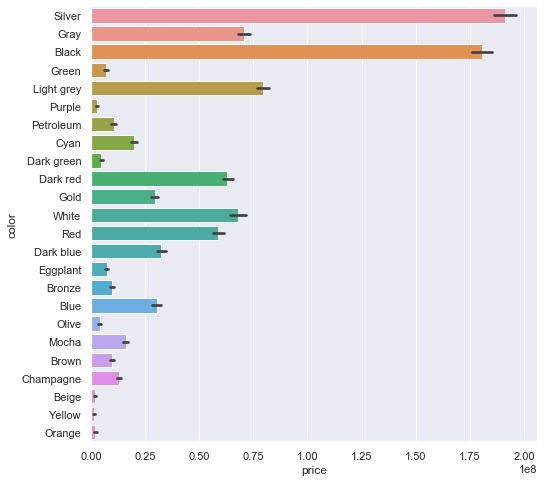

In [321]:
sns.barplot(x='price', y='color', data=df, estimator=np.sum)

## how the year of use affect the prices ?

In [22]:
sns.set(rc={'figure.figsize': [16, 8]}, font_scale=1)

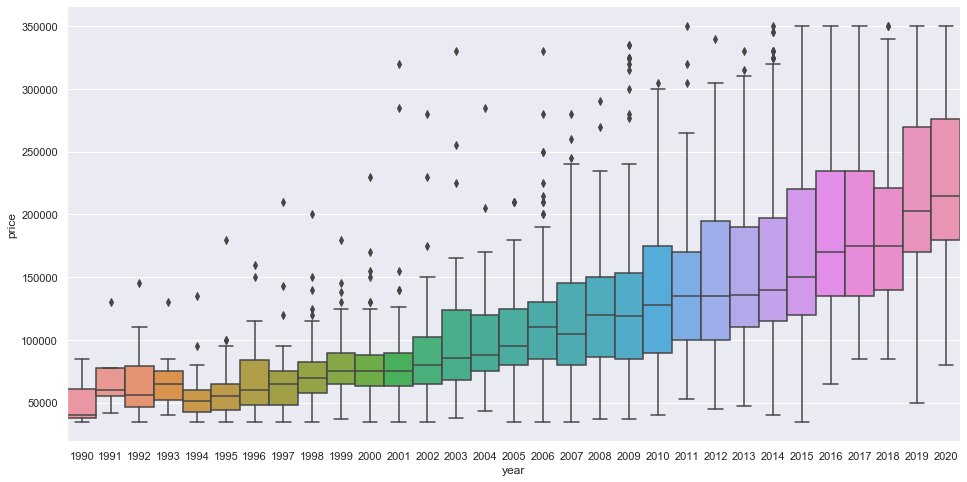

In [23]:
sns.boxplot(x="year", y="price", data=df, width=1)

In [27]:
sns.set(rc={'figure.figsize': [16, 8]}, font_scale=1)

### the latest cars are the higher in price

## what is the relation between distance traveled and year of use?

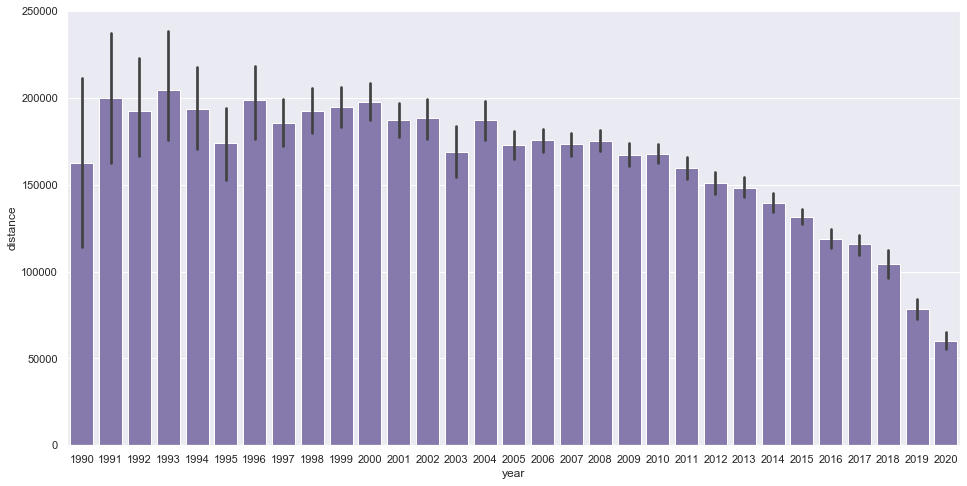

In [28]:
sns.barplot(x='year', y='distance', data=df, estimator=np.mean , color='m')

In [327]:
df.groupby('year').describe()['distance'].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1993,12.0,204750.000000,57196.829219,130000.0,172500.0,195000.0,221500.0,300000.0
1991,4.0,200000.000000,40824.829046,150000.0,187500.0,200000.0,212500.0,250000.0
1996,35.0,198800.000000,61512.695964,45000.0,160000.0,200000.0,250000.0,312000.0
2000,163.0,197734.490798,72474.012975,15000.0,150000.0,200000.0,250000.0,360000.0
1999,129.0,194548.519380,65104.220060,15000.0,150000.0,200000.0,250000.0,350000.0
1994,32.0,193687.500000,71612.504540,55000.0,147500.0,200000.0,205000.0,375000.0
1998,92.0,192597.826087,61425.387561,40000.0,150000.0,200000.0,242500.0,300000.0
1992,23.0,192565.217391,73552.594718,85000.0,140000.0,190000.0,230000.0,370000.0
2002,111.0,188353.153153,62478.330527,15000.0,150000.0,200000.0,226500.0,350000.0


## Transmission types cars prices

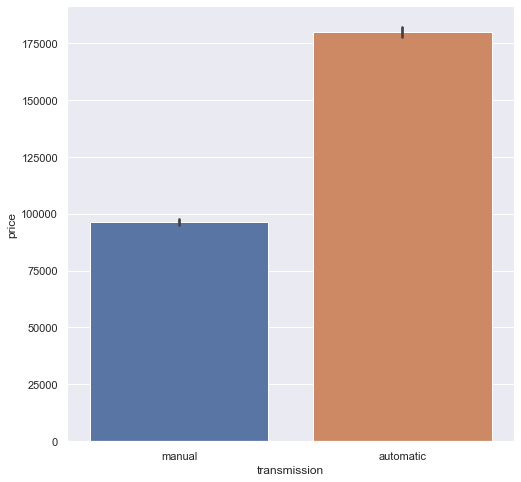

In [328]:
sns.barplot(x='transmission', y='price', data=df, estimator=np.mean)

In [294]:
df['transmission'].value_counts()

automatic    3482
manual       2989
Name: transmission, dtype: int64

## How Engine CC affects the price ?

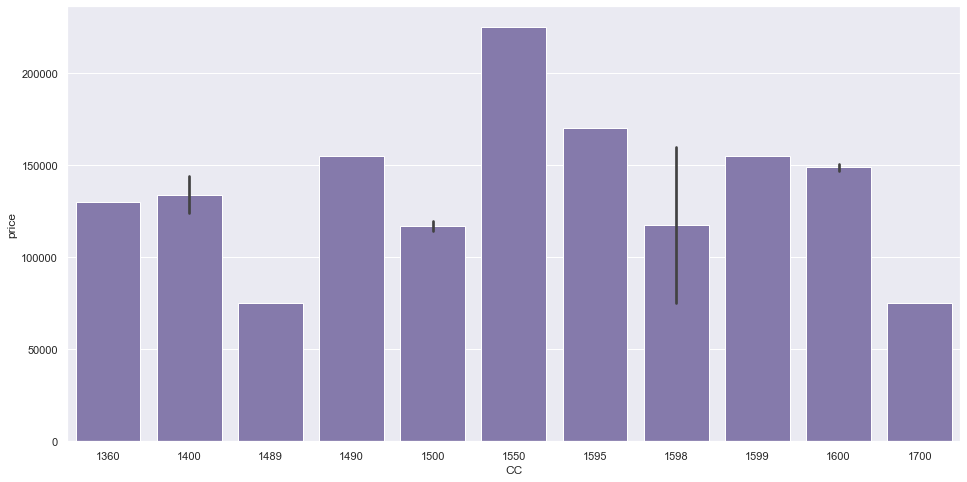

In [29]:
sns.barplot(x='CC', y='price', data=df, estimator=np.mean , color='m')

In [296]:
df.groupby('CC').describe()['price'].sort_values('count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
CC,,,,,,,,
1600,4782.0,148745.608323,67030.110302,35000.0,97000.0,135000.0,190000.0,350000.0
1500,1387.0,117219.899063,51960.850306,35000.0,80000.0,105000.0,140000.0,330000.0
1400,293.0,133713.310580,84646.725942,35000.0,55000.0,110000.0,205000.0,345000.0
1598,2.0,117500.000000,60104.076401,75000.0,96250.0,117500.0,138750.0,160000.0
1360,1.0,130000.000000,NaN,130000.0,130000.0,130000.0,130000.0,130000.0
1489,1.0,75000.000000,NaN,75000.0,75000.0,75000.0,75000.0,75000.0
1490,1.0,155000.000000,NaN,155000.0,155000.0,155000.0,155000.0,155000.0
1550,1.0,225000.000000,NaN,225000.0,225000.0,225000.0,225000.0,225000.0
1595,1.0,170000.000000,NaN,170000.0,170000.0,170000.0,170000.0,170000.0


### most of the cars are in range 1500 to 2000 CC

## What is the mean price of Manual and Automatic Tranmission for each manufacturer?

In [297]:
pd.pivot_table(df, index=['Make'], columns=['transmission'], values=['price'])

price               
transmission      automatic         manual
Make                                      
Audi                    NaN   75000.000000
BMW           233114.285714  171687.500000
Brilliance    112625.000000   95777.777778
Byd           125642.857143  131022.471910
Chana                   NaN   47000.000000
Changan       155000.000000            NaN
Chery         178138.888889  105650.000000
Chevrolet     155017.199017  104818.888889
Chrysler       85000.000000            NaN
Citroën       160833.333333   73833.333333
DFM           117000.000000            NaN
Daewoo         84166.666667   78404.522613
Daihatsu       42000.000000            NaN
Ds            285000.000000            NaN
Emgrand                 NaN  140500.000000
Faw                     NaN   54000.000000
Fiat          259366.666667   63737.654321
Ford          178733.333333   55333.333333
Geely         113583.333333   99423.280423
Great Wall              NaN   90000.000000
Haima         175000.000000   90500.000000
Honda         141268.292683   67500.000000
Hyundai       187914.062500  102526.367188
Jac                     NaN   86500.000000
Kia           199032.876712   85472.222222
Lada          127000.000000   81730.434783
Lifan                   NaN   50000.000000
MG            245430.555556            NaN
Mazda         181651.162791   73750.000000
Mercedes      284904.761905  325000.000000
Mitsubishi    191012.698413  101436.170213
Nissan        170220.194647  120033.333333
Opel          195636.871508   90478.260870
Peugeot       196149.238806   78066.666667
Pontiac       280000.000000            NaN
Proton        119500.000000   81960.000000
Renault       154506.072874  100917.840376
Saipa                   NaN   75777.777778
Seat          236218.750000   69571.428571
Senova        127571.428571  111750.000000
Skoda         185115.131579  125562.500000
Soueast       112500.000000  110000.000000
Speranza       81047.619048   76155.080214
Subaru        157000.000000  131500.000000
Suzuki        166000.000000            NaN
Toyota        225598.802395  122703.703704
Volkswagen    210698.630137  121500.000000
Volvo         285000.000000  200000.000000
Zotye         145000.000000  170000.000000

## Finding the best price of a model for each year

In [305]:
df2 =pd.pivot_table(df, index=['Make'], columns=['year'], values=['price'],aggfunc='min')
df2

price                                                   \
year           1990      1991      1992      1993     1994      1995   
Make                                                                   
Audi            NaN       NaN       NaN       NaN  40000.0       NaN   
BMW         80000.0  130000.0  110000.0  130000.0  95000.0       NaN   
Brilliance      NaN       NaN       NaN       NaN      NaN       NaN   
Byd             NaN       NaN       NaN       NaN      NaN       NaN   
Chana           NaN       NaN       NaN       NaN      NaN       NaN   
Changan         NaN       NaN       NaN       NaN      NaN       NaN   
Chery           NaN       NaN       NaN       NaN      NaN       NaN   
Chevrolet       NaN       NaN       NaN       NaN      NaN       NaN   
Chrysler        NaN       NaN       NaN       NaN      NaN       NaN   
Citroën         NaN       NaN       NaN       NaN      NaN       NaN   
DFM             NaN       NaN       NaN       NaN      NaN       NaN   
Daewoo      85000.0       NaN   55000.0       NaN  49000.0   40000.0   
Daihatsu        NaN   42000.0       NaN       NaN      NaN       NaN   
Ds              NaN       NaN       NaN       NaN      NaN       NaN   
Emgrand         NaN       NaN       NaN       NaN      NaN       NaN   
Faw             NaN       NaN       NaN       NaN      NaN       NaN   
Fiat        37000.0       NaN   38000.0   40000.0  35000.0   35000.0   
Ford            NaN       NaN       NaN       NaN      NaN       NaN   
Geely           NaN       NaN       NaN       NaN      NaN       NaN   
Great Wall      NaN       NaN       NaN       NaN      NaN       NaN   
Haima           NaN       NaN       NaN       NaN      NaN       NaN   
Honda           NaN   60000.0   65000.0   70000.0      NaN   65000.0   
Hyundai         NaN       NaN   45000.0       NaN  38000.0   35000.0   
Jac             NaN       NaN       NaN       NaN      NaN       NaN   
Kia             NaN       NaN       NaN   45000.0      NaN   42000.0   
Lada            NaN       NaN       NaN       NaN  35000.0   35000.0   
Lifan           NaN       NaN       NaN       NaN      NaN       NaN   
MG              NaN       NaN       NaN       NaN      NaN       NaN   
Mazda           NaN       NaN       NaN       NaN      NaN       NaN   
Mercedes        NaN       NaN       NaN       NaN      NaN  180000.0   
Mitsubishi  35000.0       NaN   56000.0   55000.0      NaN       NaN   
Nissan          NaN   60000.0       NaN       NaN      NaN       NaN   
Opel            NaN       NaN   52000.0       NaN  55000.0   50000.0   
Peugeot         NaN       NaN   55000.0       NaN  35000.0   45000.0   
Pontiac         NaN       NaN       NaN       NaN      NaN       NaN   
Proton          NaN       NaN       NaN       NaN      NaN       NaN   
Renault     38000.0       NaN       NaN       NaN      NaN   40000.0   
Saipa           NaN       NaN       NaN       NaN      NaN       NaN   
Seat            NaN       NaN   35000.0       NaN  52000.0       NaN   
Senova          NaN       NaN       NaN       NaN      NaN       NaN   
Skoda           NaN       NaN       NaN       NaN      NaN       NaN   
Soueast         NaN       NaN       NaN       NaN      NaN       NaN   
Speranza        NaN       NaN       NaN       NaN      NaN       NaN   
Subaru          NaN       NaN       NaN       NaN      NaN       NaN   
Suzuki          NaN       NaN       NaN       NaN      NaN       NaN   
Toyota      55000.0       NaN   52000.0   75000.0  55000.0   72000.0   
Volkswagen      NaN       NaN       NaN       NaN      NaN       NaN   
Volvo           NaN       NaN       NaN       NaN      NaN       NaN   
Zotye           NaN       NaN       NaN       NaN      NaN       NaN   

                                                    ...                      \
year            1996      1997      1998      1999  ...      2011      2012   
Make                                                ...                       
Audi        110000.0       NaN  

## One Hot Encoder

### Encode categorical features as a one-hot numeric array.
### This encoding is needed for feeding categorical data to many scikit-learn estimators and models

In [254]:
df['CC'].value_counts()

1600    4782
1500    1387
1400     293
1598       2
1550       1
1489       1
1490       1
1599       1
1595       1
1700       1
1360       1
Name: CC, dtype: int64

In [255]:
i1=df[ (df['CC'] == 1360) ].index
i2=df[ (df['CC'] == 1700) ].index
i3=df[ (df['CC'] == 1595) ].index
i4=df[ (df['CC'] == 1599) ].index
i5=df[ (df['CC'] == 1490) ].index
i6=df[ (df['CC'] == 1489) ].index
i7=df[ (df['CC'] == 1550) ].index
i8=df[ (df['CC'] == 1598) ].index


In [256]:
idx = [i1,
i2,
i3,
i4,
i5,
i6,
i7,
i8]

In [257]:
for i in idx :
    df.drop(i , axis=0, inplace=True)

In [258]:
df['CC'] = df['CC'].apply(str)


In [259]:
df.describe()

,year,distance,price
count,6462.000000,6462.000000,6462.000000
mean,2010.277004,150539.402043,141297.353606
std,6.242905,66930.240560,66301.367534
min,1990.000000,45.000000,35000.000000
25%,2007.000000,100000.000000,90000.000000
50%,2011.000000,150000.000000,128000.000000
75%,2015.000000,200000.000000,180000.000000
max,2020.000000,375000.000000,350000.000000


In [260]:
x = df.drop('price', axis=1)
y = df['price']

In [261]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [262]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [263]:
encoder.fit(x_train) 
x_test = encoder.transform(x_test)
x_train = encoder.transform(x_train)

## Scaling data

In [264]:
scaler = StandardScaler(with_mean=False)

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Different ML models

In [265]:
models = {
    'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(), 
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor()
         }


for name, model in models.items():
    print(f'Training {name}...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'Testing R2: {r2_score(y_test, y_pred)}')
    print('-'*50)

Training LR...
Testing RMSE: 25393.44243605435
Testing MAE: 18277.04154845295
Testing R2: 0.852171430695389
--------------------------------------------------
Training DT...
Testing RMSE: 29845.03484839663
Testing MAE: 19614.375579598145
Testing R2: 0.7957982802360422
--------------------------------------------------
Training KNN...
Testing RMSE: 46716.34770083605
Testing MAE: 30862.131375579596
Testing R2: 0.49967410723758976
--------------------------------------------------
Training SVM...
Testing RMSE: 66562.86869531928
Testing MAE: 51356.597393276206
Testing R2: -0.01573233036980448
--------------------------------------------------
Training RF...
Testing RMSE: 25107.881869901656
Testing MAE: 16508.802358983965
Testing R2: 0.8554775324483482
--------------------------------------------------
Training XGB...
Testing RMSE: 23382.640983596
Testing MAE: 16066.183563562596
Testing R2: 0.8746563498153697
--------------------------------------------------


## Cross Validation and Hyperparameter tuning for XGBRegressor

### XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [160]:
model_f = XGBRegressor()
params = [
    {'criterion': ['gini', 'entropy'],
     'max_depth': range(3, 20),
     'n_estimators': range(200, 501, 50)
     
    }
]


#### max_depth: The maximum depth of a tree,  is used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample. Increasing this value will make the model more complex and more likely to overfit.

#### n_estimators: The number of trees (or rounds) in an XGBoost model

#### criterion : This parameter is the function used to measure the quality of nodes split of the features and it allows users to choose between ‘gini‘ or ‘entropy‘

In [161]:
gs_f = GridSearchCV(estimator=model_f, param_grid=params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=3)

In [162]:
gs_f.fit(x_train , y_train)

Fitting 5 folds for each of 238 candidates, totalling 1190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 1190 out of 1190 | elapsed: 21.5min finished


[18:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [163]:
gs_f.best_score_

-15823.686586320264

In [164]:
gs_f.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 500}

In [165]:
model_en = gs_f.best_estimator_
model_en

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             criterion='gini', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [166]:
model_en.fit(x_train, y_train)

[19:00:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             criterion='gini', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [167]:
y_pred = model_en.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))
print(f'Testing R2: {r2_score(y_test, y_pred)}')

21096.89653345914
14819.024119251178
Testing R2: 0.8930067667812909


## saving model

In [169]:
import joblib

In [170]:
joblib.dump(model_en, 'model_en.h5')

['model_en.h5']

In [171]:
joblib.dump(encoder, 'encoder.h5')

['encoder.h5']

In [172]:
joblib.dump(scaler, 'en_scaler.h5')

['en_scaler.h5']

In [336]:
client = ["Hyundai", "Verna", 2014 , 1600 ,143000 ,"manual", "Silver"]
client = encoder.transform([client])
client = scaler.transform(client)
prediction = model.predict(client)[0]
prediction

120279.22